# Logistic Regression 與 SVM 的簡易比較

## 此程式將同一份資料分別送入Logistic Regression與SVM去做訓練，觀察測試結果，繪製圖形，並比較兩者差異

## 資料來源: sklearn.datasets
## 參考資料: https://bit.ly/2U0I9K4 、 https://bit.ly/2UXKglC


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
x_data=iris.data[:,0:2]
y_data=iris.target


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=1)


## 標準化

將資料標準化，確保我們訓練不會受到極端資料所影響

參考資料: https://zh.wikipedia.org/wiki/%E7%89%B9%E5%BE%B5%E7%B8%AE%E6%94%BE

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #將測試資料根據分類分別繪出
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y == cl, 0], 
                    X[y == cl, 1],
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)


   

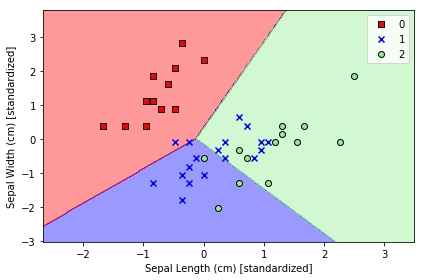

In [8]:
plot_decision_regions(x_test_std, y_test, classifier=lr)
plt.xlabel('Sepal Length (cm) [standardized]')
plt.ylabel('Sepal Width (cm) [standardized]')
plt.legend(loc='upper right')
plt.tight_layout()

In [9]:
lr.score(x_test_std,y_test)

0.6888888888888889

In [10]:
from sklearn.svm import SVC

In [11]:
clf=SVC(kernel='linear')
nclf=SVC()

In [12]:
clf.fit(x_train_std,y_train)
nclf.fit(x_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

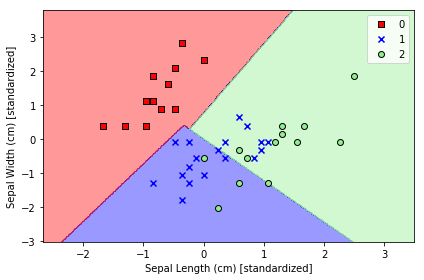

In [13]:
plot_decision_regions(x_test_std, y_test, classifier=clf)
plt.xlabel('Sepal Length (cm) [standardized]')
plt.ylabel('Sepal Width (cm) [standardized]')
plt.legend(loc='upper right')
plt.tight_layout()

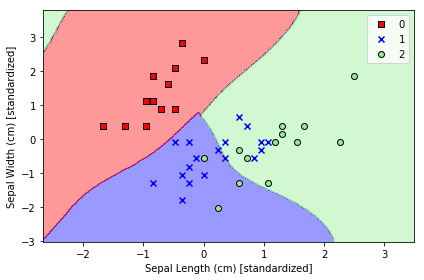

In [14]:
plot_decision_regions(x_test_std, y_test, classifier=nclf)
plt.xlabel('Sepal Length (cm) [standardized]')
plt.ylabel('Sepal Width (cm) [standardized]')
plt.legend(loc='upper right')
plt.tight_layout()

In [15]:
clf.score(x_test_std,y_test)

0.7777777777777778

In [16]:
nclf.score(x_test_std,y_test)

0.7777777777777778

# 小結

從測試結果來看，Logistic Regression與線性SVM差異不大，不過非線性SVM的左上角有一小塊為分類2的區域。

在正確率上，兩者相對接近，Logistic Regression為7成，SVM為8成

## 替換訓練資料

由於前面的測試資料第1類與第2類相當接近，懷疑是因為分類與Sepal Length (cm)或Sepal Width (cm)其中一項無關  
因此將Sepal Width (cm)改為Petal Length (cm)再做一次

In [17]:
x1_data = iris.data[:,0]
x2_data = iris.data[:,2]
xx_data = np.c_[x1_data,x2_data]


In [18]:
xx_train,xx_test,yy_train,yy_test = train_test_split(xx_data,y_data,test_size=0.3,random_state=1)

In [19]:
sc2 = StandardScaler()
sc2.fit(xx_train)
xx_train_std = sc2.transform(xx_train)
xx_test_std = sc2.transform(xx_test)

In [20]:
lr2 = LogisticRegression()
lr2.fit(xx_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

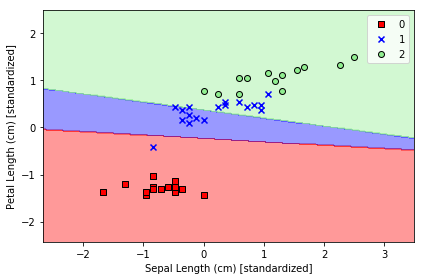

In [21]:
plot_decision_regions(xx_test_std, y_test, classifier=lr2)
plt.xlabel('Sepal Length (cm) [standardized]')
plt.ylabel('Petal Length (cm) [standardized]')
plt.legend(loc='upper right')
plt.tight_layout()

In [22]:
lr2.score(xx_test_std,y_test)

0.7555555555555555

In [23]:
clf2=SVC(kernel='linear')
nclf2=SVC()

In [24]:
clf2.fit(xx_train_std,y_train)
nclf2.fit(xx_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

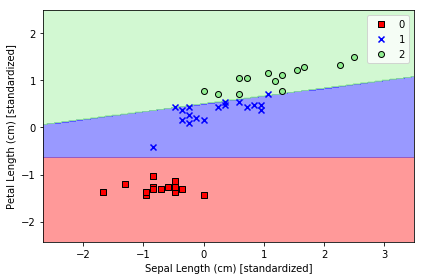

In [25]:
plot_decision_regions(xx_test_std, y_test, classifier=clf2)
plt.xlabel('Sepal Length (cm) [standardized]')
plt.ylabel('Petal Length (cm) [standardized]')
plt.legend(loc='upper right')
plt.tight_layout()

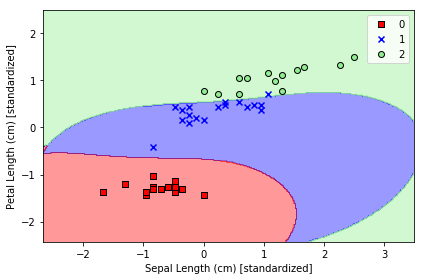

In [26]:
plot_decision_regions(xx_test_std, y_test, classifier=nclf2)
plt.xlabel('Sepal Length (cm) [standardized]')
plt.ylabel('Petal Length (cm) [standardized]')
plt.legend(loc='upper right')
plt.tight_layout()

In [27]:
clf2.score(xx_test_std,y_test)

0.9555555555555556

In [28]:
nclf2.score(xx_test_std,y_test)

0.9777777777777777

# 小結

更換過資料後，確實不論是Logistic Regression或是SVM的正確率皆有提高，其中非線性SVM的正確率更高達9成7  
並且可以看出Logistic Regression與線性SVM在決策面上的差異(線性SVM的決策面較為合理)

# 總結

從測試結果來看，在這邊似乎比較不適合用Logistic Regression，其原因可能是為特徵點及樣本數都過少。  
不過Logistic Regression與SVM最大的不同就是除了能輸出類別以外，還能夠輸出機率大小。  
而如何選擇使用哪一種學習機，從網路上能查到大略的選擇法就是Logistic Regression比較適合拿來做大數據而SVM則相反適合小數據

參考資料:https://www.itread01.com/content/1547055726.html

